# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [7]:
df_atletas = pd.read_csv("./dados/athlete_events.csv")
df_atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [8]:
df_atletas_brasil = df_atletas[df_atletas['NOC'] == 'BRA']
df_atletas_brasil.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


In [9]:
df_atletas_brasil_medalhas = df_atletas_brasil[df_atletas_brasil['Medal'].notna()]
df_atletas_brasil_medalhas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

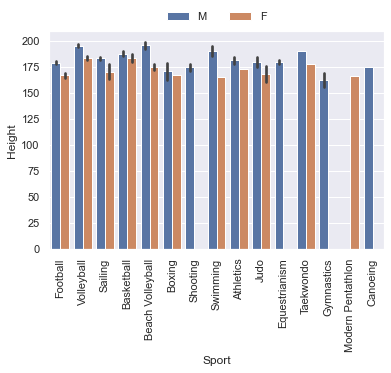

In [10]:
sns.set()
grafico_relacao_esporte_altura = sns.barplot(x='Sport', y='Height', data=df_atletas_brasil_medalhas, hue='Sex');
grafico_relacao_esporte_altura.set_xticklabels(grafico_relacao_esporte_altura.get_xticklabels(), rotation=90);
sns.move_legend(
    grafico_relacao_esporte_altura, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

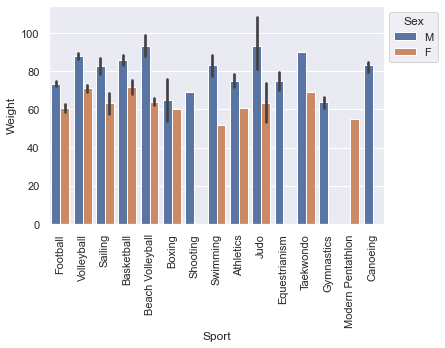

In [11]:
sns.set()
grafico_relacao_esporte_peso = sns.barplot(x='Sport', y='Weight', data=df_atletas_brasil_medalhas, hue='Sex');
grafico_relacao_esporte_peso.set_xticklabels(grafico_relacao_esporte_peso.get_xticklabels(), rotation=90);
sns.move_legend(grafico_relacao_esporte_peso, "upper left", bbox_to_anchor=(1, 1));


Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [12]:
series_medalhas_por_atleta = df_atletas_brasil_medalhas.groupby(by = 'Name')['Medal'].value_counts()
series_medalhas_por_atleta.head(10)

Name                                 Medal 
Ademir Roque Kaefer                  Silver    2
Adenzia Aparecida Ferreira da Silva  Gold      1
Adhemar Ferreira da Silva            Gold      2
Adriana "Adrianinha" Moiss Pinto     Bronze    1
Adriana Aparecida dos Santos         Bronze    1
                                     Silver    1
Adriana Brando Behar                 Silver    2
Adriana Ramos Samuel                 Bronze    1
                                     Silver    1
Adriana dos Santos Arajo             Bronze    1
Name: Medal, dtype: int64

In [13]:
df_medalhas_por_atleta = pd.DataFrame(series_medalhas_por_atleta)
df_medalhas_por_atleta.rename(columns = { 
    'Medal':'Quantity'
}, inplace = True)
df_medalhas_por_atleta.reset_index(inplace = True)
df_medalhas_por_atleta

,Name,Medal,Quantity
0,Ademir Roque Kaefer,Silver,2
1,Adenzia Aparecida Ferreira da Silva,Gold,1
2,Adhemar Ferreira da Silva,Gold,2
3,"Adriana ""Adrianinha"" Moiss Pinto",Bronze,1
4,Adriana Aparecida dos Santos,Bronze,1
...,...,...,...
408,der Francis Carbonera,Gold,1
409,gatha Bednarczuk Rippel,Silver,1
410,nderson Lus de Abreu Oliveira,Bronze,1
411,rika Cristiano dos Santos,Silver,1


In [14]:
df_medalhas_por_atleta.sort_values(by = 'Quantity', ascending = False, inplace = True)
df_medalhas_por_atleta

,Name,Medal,Quantity
0,Ademir Roque Kaefer,Silver,2
186,Jatyr Eduardo Schall,Bronze,2
83,"Carmo ""Rosa Branca"" de Souza",Bronze,2
79,"Carlos ""Mosquito"" Domingos Massoni",Bronze,2
165,Gustavo Frana Borges,Bronze,2
...,...,...,...
145,Fernando Soledade,Bronze,1
143,"Fernando ""Fernando"" Roscio de vila",Silver,1
142,"Fernando ""Fernando Brobr"" Pereira de Freitas",Bronze,1
141,Fernanda Ryff Moreira Oliveira,Bronze,1


In [15]:
serie_total_medalhas_por_atleta =df_medalhas_por_atleta.groupby(by='Name')['Quantity'].sum()
df_total_medalhas_por_atleta = pd.DataFrame(serie_total_medalhas_por_atleta)
df_total_medalhas_por_atleta.sort_values(by = 'Quantity', ascending = False, inplace = True)
df_total_medalhas_por_atleta.reset_index(inplace = True)
lista_nomes = df_total_medalhas_por_atleta['Name'].to_list()
lista_dez_primeiros= lista_nomes [:10]
lista_dez_primeiros


['Robert Scheidt',
 'Torben Schmidt Grael',
 'Gustavo Frana Borges',
 'Srgio "Escadinha" Dutra dos Santos',
 'Rodrigo "Rodrigo" Santana',
 'Gilberto Amauri "Giba" de Godoy Filho',
 'Bruno "Bruninho" Mossa de Rezende',
 'Rodrigo de Paula Pessoa',
 'Emanuel Fernando Scheffler Rego',
 'Dante Guimares Santos do Amaral']

In [16]:
mapa = { 
    'Robert Scheidt' : 'rankear',
    'Torben Schmidt Grael': 'rankear',
    'Gustavo Frana Borges' : 'rankear',
    'Srgio "Escadinha" Dutra dos Santos': 'rankear',
    'Rodrigo "Rodrigo" Santana': 'rankear',
    'Gilberto Amauri "Giba" de Godoy Filho': 'rankear',
    'Bruno "Bruninho" Mossa de Rezende': 'rankear',
    'Rodrigo de Paula Pessoa': 'rankear',
    'Emanuel Fernando Scheffler Rego': 'rankear',
    'Dante Guimares Santos do Amaral': 'rankear'
}

df_medalhas_por_atleta['Top 10']= df_medalhas_por_atleta['Name'].map(mapa)
df_medalhas_por_atleta.dropna(inplace = True)
df_medalhas_por_atleta

,Name,Medal,Quantity,Top 10
165,Gustavo Frana Borges,Bronze,2,rankear
166,Gustavo Frana Borges,Silver,2,rankear
71,"Bruno ""Bruninho"" Mossa de Rezende",Silver,2,rankear
361,"Srgio ""Escadinha"" Dutra dos Santos",Gold,2,rankear
362,"Srgio ""Escadinha"" Dutra dos Santos",Silver,2,rankear
155,"Gilberto Amauri ""Giba"" de Godoy Filho",Silver,2,rankear
322,Robert Scheidt,Gold,2,rankear
323,Robert Scheidt,Silver,2,rankear
102,Dante Guimares Santos do Amaral,Silver,2,rankear
327,"Rodrigo ""Rodrigo"" Santana",Silver,2,rankear


In [17]:
fig = px.bar(df_medalhas_por_atleta, x="Name", y="Quantity", color="Medal", title="Top 10 Medalhistas", category_orders={ 'Name': lista_dez_primeiros})
fig.show()

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [18]:
df_atletas_brasil.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


In [19]:
df_atletas_brasil_medalhas_evento = df_atletas_brasil_medalhas.drop_duplicates(subset = ['Year','Event'])

df_atletas_brasil_medalhas_evento_esporte = pd.DataFrame(df_atletas_brasil_medalhas_evento.groupby(by = 'Sport')['Medal'].value_counts())

df_atletas_brasil_medalhas_evento_esporte.rename(columns = { 
    'Medal':'Quantity'
}, inplace = True)
df_atletas_brasil_medalhas_evento_esporte.reset_index(inplace = True)

df_atletas_brasil_medalhas_evento_esporte.head()

,Sport,Medal,Quantity
0,Athletics,Bronze,8
1,Athletics,Gold,5
2,Athletics,Silver,3
3,Basketball,Bronze,4
4,Basketball,Silver,1


In [20]:
serie_total_medalhas_por_atleta_medalha_por_esporte =df_atletas_brasil_medalhas_evento_esporte.groupby(by='Sport')['Quantity'].sum()
df_atletas_brasil_medalhas_evento_esporte_total_medalha= pd.DataFrame(serie_total_medalhas_por_atleta_medalha_por_esporte)
df_atletas_brasil_medalhas_evento_esporte_total_medalha.sort_values(by = 'Quantity', ascending = False, inplace = True)
df_atletas_brasil_medalhas_evento_esporte_total_medalha.reset_index(inplace = True)
lista_esportes = df_atletas_brasil_medalhas_evento_esporte_total_medalha['Sport'].to_list()
lista_esportes

['Judo',
 'Sailing',
 'Athletics',
 'Swimming',
 'Beach Volleyball',
 'Volleyball',
 'Football',
 'Basketball',
 'Boxing',
 'Shooting',
 'Canoeing',
 'Equestrianism',
 'Gymnastics',
 'Taekwondo',
 'Modern Pentathlon']

In [21]:
fig2 = px.bar(df_atletas_brasil_medalhas_evento_esporte, x='Sport', y='Quantity', color="Medal", title="Medalhas por Esportes", category_orders={ 'Sport': lista_esportes})
fig2.show()

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [22]:

df_atletas_brasil_medalhas_evento_tipos = pd.DataFrame(df_atletas_brasil_medalhas_evento.groupby(by = 'Event')['Medal'].value_counts())

df_atletas_brasil_medalhas_evento_tipos.rename(columns = { 
    'Medal':'Quantity'
}, inplace = True)
df_atletas_brasil_medalhas_evento_tipos.reset_index(inplace = True)

df_atletas_brasil_medalhas_evento_tipos.head()

,Event,Medal,Quantity
0,Athletics Men's 200 metres,Bronze,1
1,Athletics Men's 4 x 100 metres Relay,Bronze,2
2,Athletics Men's 4 x 100 metres Relay,Silver,1
3,Athletics Men's 800 metres,Gold,1
4,Athletics Men's 800 metres,Silver,1


In [23]:
serie_total_medalhas_por_evento=df_atletas_brasil_medalhas_evento_tipos.groupby(by='Event')['Quantity'].sum()
df_atletas_brasil_medalhas_evento_tipos_total_medalha= pd.DataFrame(serie_total_medalhas_por_evento)
df_atletas_brasil_medalhas_evento_tipos_total_medalha.sort_values(by = 'Quantity', ascending = False, inplace = True)
df_atletas_brasil_medalhas_evento_tipos_total_medalha.reset_index(inplace = True)
lista_eventos = df_atletas_brasil_medalhas_evento_tipos_total_medalha['Event'].to_list()
lista_eventos[:5]

["Volleyball Men's Volleyball",
 "Football Men's Football",
 "Athletics Men's Triple Jump",
 "Beach Volleyball Men's Beach Volleyball",
 "Beach Volleyball Women's Beach Volleyball"]

In [24]:
fig3 = px.bar(df_atletas_brasil_medalhas_evento_tipos, x='Event', y='Quantity', color="Medal", title="Medalhas por Evento Esportivo", category_orders={ 'Event': lista_eventos})
fig3.show()

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [25]:
df_atletas_brasil_medalhas_evento_esporte_total_medalha.head()

,Sport,Quantity
0,Judo,22
1,Sailing,18
2,Athletics,16
3,Swimming,14
4,Beach Volleyball,10


In [26]:
fig4 = px.histogram(x = df_atletas_brasil_medalhas_evento_esporte_total_medalha['Sport'], y = df_atletas_brasil_medalhas_evento_esporte_total_medalha['Quantity'], title = 'Quantidade de medalhas por esporte');
fig4.update_xaxes(title_text = 'Esportes')
fig4.update_yaxes(title_text = 'Quantidade de medalhas')
fig4.show();


Repita o procedimento acima, mas com medalhas de ouro.

In [27]:
df_atletas_brasil_medalhas_evento_esporte.head()

,Sport,Medal,Quantity
0,Athletics,Bronze,8
1,Athletics,Gold,5
2,Athletics,Silver,3
3,Basketball,Bronze,4
4,Basketball,Silver,1


In [28]:
df_atletas_brasil_medalhas_evento_esporte_ouro = df_atletas_brasil_medalhas_evento_esporte[df_atletas_brasil_medalhas_evento_esporte['Medal'] == 'Gold']
df_atletas_brasil_medalhas_evento_esporte_ouro.sort_values(by = 'Quantity', ascending = False, inplace = True)
df_atletas_brasil_medalhas_evento_esporte_ouro.head()

C:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Sport,Medal,Quantity
25,Sailing,Gold,7
1,Athletics,Gold,5
34,Volleyball,Gold,5
21,Judo,Gold,4
7,Beach Volleyball,Gold,2


In [29]:
fig5 = px.histogram(x = df_atletas_brasil_medalhas_evento_esporte_ouro['Sport'], y = df_atletas_brasil_medalhas_evento_esporte_ouro['Quantity'], title = 'Quantidade de ouros por esporte');
fig5.update_xaxes(title_text = 'Esportes')
fig5.update_yaxes(title_text = 'Quantidade de medalhasde ouro')
fig5.show();

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [30]:
fig6 = px.pie(df_atletas_brasil_medalhas_evento_esporte_ouro, values='Quantity', names='Sport', title='Quantidade de ouros por esporte',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig6.show()

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [31]:
df_atletas_brasil_medalhas_evento_edicao = pd.DataFrame(df_atletas_brasil_medalhas_evento.groupby(by = 'Year')['Medal'].value_counts())
df_atletas_brasil_medalhas_evento_edicao.rename(columns = {'Medal': 'Quantity'}, inplace = True)
df_atletas_brasil_medalhas_evento_edicao.reset_index(inplace = True)
df_atletas_brasil_medalhas_evento_edicao.head()

,Year,Medal,Quantity
0,1920,Bronze,1
1,1920,Gold,1
2,1920,Silver,1
3,1948,Bronze,1
4,1952,Bronze,2


In [32]:
df_atletas_brasil_medalhas_evento_edicao_bronze = df_atletas_brasil_medalhas_evento_edicao[df_atletas_brasil_medalhas_evento_edicao['Medal']== 'Bronze']
df_atletas_brasil_medalhas_evento_edicao_prata = df_atletas_brasil_medalhas_evento_edicao[df_atletas_brasil_medalhas_evento_edicao['Medal']== 'Silver']
df_atletas_brasil_medalhas_evento_edicao_ouro = df_atletas_brasil_medalhas_evento_edicao[df_atletas_brasil_medalhas_evento_edicao['Medal']== 'Gold']

df_atletas_brasil_medalhas_evento_edicao_bronze.head()

,Year,Medal,Quantity
0,1920,Bronze,1
3,1948,Bronze,1
4,1952,Bronze,2
7,1960,Bronze,2
8,1964,Bronze,1


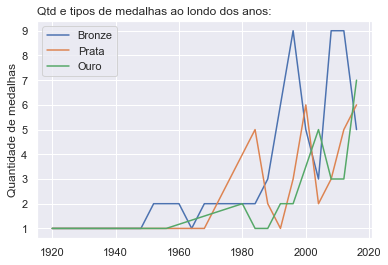

In [33]:
fig7 = plt.plot(df_atletas_brasil_medalhas_evento_edicao_bronze['Year'], df_atletas_brasil_medalhas_evento_edicao_bronze['Quantity'], label = 'Bronze');
fig7 = plt.plot(df_atletas_brasil_medalhas_evento_edicao_prata['Year'], df_atletas_brasil_medalhas_evento_edicao_prata['Quantity'], label = 'Prata')
fig7 = plt.plot(df_atletas_brasil_medalhas_evento_edicao_ouro['Year'], df_atletas_brasil_medalhas_evento_edicao_ouro['Quantity'], label = 'Ouro')
plt.title('Qtd e tipos de medalhas ao londo dos anos:', loc = 'left')
plt.ylabel('Quantidade de medalhas');
plt.legend()
fig7;

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [34]:
df_atletas_verao = df_atletas[df_atletas['Season'] == 'Summer']
df_atletas_verao_medalhas = df_atletas_verao[df_atletas_verao['Medal'].notna() ] 
df_atletas_verao_medalhas.head() 


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

In [35]:
df_atletas_verao_medalhas_por_nome = pd.DataFrame(df_atletas_verao_medalhas.groupby(by = 'Name')['Medal'].value_counts())
df_atletas_verao_medalhas_por_nome.rename(columns = {'Medal': 'Quantity'}, inplace = True)
df_atletas_verao_medalhas_por_nome.reset_index(inplace = True)
df_atletas_verao_medalhas_por_nome

,Name,Medal,Quantity
0,A. Albert,Gold,1
1,A. Dubois,Bronze,1
2,A. Dubois,Silver,1
3,"A. Joshua ""Josh"" West",Silver,1
4,A. Lawry,Silver,1
...,...,...,...
29077,va Rakusz,Silver,1
29078,va Risztov,Gold,1
29079,va Szkely (-Gyarmati),Gold,1
29080,va Szkely (-Gyarmati),Silver,1


In [66]:
df_atletas_verao_medalhas_por_nome_total = pd.DataFrame(df_atletas_verao_medalhas_por_nome.groupby(by='Name')['Quantity'].sum())
df_atletas_verao_medalhas_por_nome_total.rename(columns = {'Quantity': 'Total'}, inplace = True)
df_atletas_verao_medalhas_por_nome_total.reset_index(inplace = True)
df_atletas_verao_medalhas_por_nome_total.max()

Name     ver Maximiliano David Banega
Total                              28
dtype: object

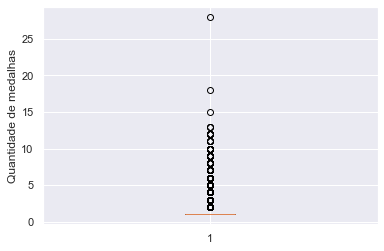

In [67]:
boxplot_total_medalhas_por_atleta = plt.boxplot(x=df_atletas_verao_medalhas_por_nome_total['Total']);
plt.ylabel('Quantidade de medalhas');

In [68]:
df_atletas_verao_medalhas_por_nome_total['Total'] = df_atletas_verao_medalhas_por_nome_total['Total'][df_atletas_verao_medalhas_por_nome_total['Total'].between(df_atletas_verao_medalhas_por_nome_total['Total'].quantile(.1), df_atletas_verao_medalhas_por_nome_total['Total'].quantile(.999))]
df_atletas_verao_medalhas_por_nome_total['Total'].max()

10.0

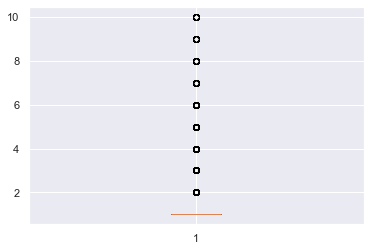

In [71]:
plt.boxplot(x=df_atletas_verao_medalhas_por_nome_total['Total'].dropna());

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [95]:
df_atletas_verao_medalhas_por_evento = df_atletas_verao_medalhas.drop_duplicates(subset = ['Year','Event'])
df_atletas_verao_medalhas_por_evento_ouro = df_atletas_verao_medalhas_por_evento[df_atletas_verao_medalhas_por_evento['Medal'] == 'Gold']
df_atletas_verao_medalhas_por_evento_ouro_paises = pd.DataFrame(df_atletas_verao_medalhas_por_evento_ouro.groupby(by = 'NOC')['Medal'].value_counts())
df_atletas_verao_medalhas_por_evento_ouro_paises.rename(columns = { 'Medal': 'Quantity'}, inplace = True)
df_atletas_verao_medalhas_por_evento_ouro_paises.reset_index(inplace = True)
df_atletas_verao_medalhas_por_evento_ouro_paises.sort_values(by = 'Quantity', ascending = False, inplace = True)
df_atletas_verao_medalhas_por_evento_ouro_paises_top10 = df_atletas_verao_medalhas_por_evento_ouro_paises[:10]
df_atletas_verao_medalhas_por_evento_ouro_paises_outros = df_atletas_verao_medalhas_por_evento_ouro_paises[10:]
series_total_outros = df_atletas_verao_medalhas_por_evento_ouro_paises_outros.groupby(by = 'Medal')['Quantity'].sum() 
df_outros = pd.DataFrame(series_total_outros)
df_outros.reset_index(inplace = True)
df_outros['NOC'] = 'Outros'
df_outros =  df_outros[['NOC', 'Medal', 'Quantity']]
df_outros

,NOC,Medal,Quantity
0,Outros,Gold,660


In [96]:
df_atletas_verao_medalhas_por_evento_ouro_paises_top11 = df_atletas_verao_medalhas_por_evento_ouro_paises_top10.append(df_outros)
df_atletas_verao_medalhas_por_evento_ouro_paises_top11

,NOC,Medal,Quantity
79,USA,Gold,376
77,URS,Gold,124
26,FRA,Gold,100
39,ITA,Gold,90
28,GBR,Gold,90
31,GER,Gold,78
33,HUN,Gold,54
66,SWE,Gold,52
13,CHN,Gold,51
4,AUS,Gold,48


In [97]:
fig9 = px.pie(df_atletas_verao_medalhas_por_evento_ouro_paises_top11, values='Quantity', names='NOC', title='Quantidade de ouros por país',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig9.show()

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [102]:
df_atletas_verao_medalhas_por_evento = df_atletas_verao_medalhas.drop_duplicates(subset = ['Year','Event'])
df_atletas_verao_medalhas_por_evento_paises = pd.DataFrame(df_atletas_verao_medalhas_por_evento.groupby(by = 'NOC')['Medal'].value_counts())
df_atletas_verao_medalhas_por_evento_paises.rename(columns = { 'Medal': 'Quantity'}, inplace = True)
df_atletas_verao_medalhas_por_evento_paises.reset_index(inplace = True)
df_atletas_verao_medalhas_por_evento_paises_total = pd.DataFrame(df_atletas_verao_medalhas_por_evento_paises.groupby(by='NOC')['Quantity'].sum())
df_atletas_verao_medalhas_por_evento_paises_total.rename(columns = { 'Quantity': 'Total'}, inplace = True)
df_atletas_verao_medalhas_por_evento_paises_total.reset_index(inplace = True)
df_atletas_verao_medalhas_por_evento_paises_total

,NOC,Total
0,AHO,1
1,ALG,4
2,ANZ,8
3,ARG,36
4,ARM,9
...,...,...
115,VEN,5
116,VIE,3
117,WIF,1
118,YUG,23


In [104]:
df_atletas_verao_medalhas_por_evento_paises_total.sort_values(by = 'Total', ascending = False, inplace = True)
df_atletas_verao_medalhas_por_evento_paises_total_top10 = df_atletas_verao_medalhas_por_evento_paises_total[:10]
df_atletas_verao_medalhas_por_evento_paises_total_outros = df_atletas_verao_medalhas_por_evento_paises_total[10:]
df_atletas_verao_medalhas_por_evento_paises_total_outros['Flag'] = 'Outros'
df_atletas_verao_medalhas_por_evento_paises_total_outros

<ipython-input-104-bcea73393ead>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NOC,Total,Flag
18,CHN,125,Outros
87,ROU,121,Outros
36,GDR,115,Outros
57,JPN,99,Outros
16,CAN,98,Outros
...,...,...,...
0,AHO,1,Outros
107,UAE,1,Outros
102,TOG,1,Outros
117,WIF,1,Outros


In [106]:
series_total_todas_medalhas_outros = df_atletas_verao_medalhas_por_evento_paises_total_outros.groupby(by = 'Flag')['Total'].sum() 
df_outros_total = pd.DataFrame(series_total_todas_medalhas_outros)
df_outros_total.reset_index(inplace = True)
df_outros_total

,Flag,Total
0,Outros,2219


In [108]:
df_outros_total['NOC'] = 'Outros'
df_outros_total =  df_outros_total[['NOC', 'Flag', 'Total']]
df_outros_total.drop('Flag', axis = 1, inplace = True)
df_outros_total

,NOC,Total
0,Outros,2219


In [109]:
df_atletas_verao_medalhas_por_evento_total_paises_top11 = df_atletas_verao_medalhas_por_evento_paises_total_top10.append(df_outros_total)
df_atletas_verao_medalhas_por_evento_total_paises_top11

,NOC,Total
113,USA,892
111,URS,318
35,GBR,315
33,FRA,311
38,GER,258
54,ITA,244
96,SWE,196
45,HUN,160
89,RUS,153
5,AUS,150


In [110]:
fig10 = px.pie(df_atletas_verao_medalhas_por_evento_total_paises_top11, values='Total', names='NOC', title='Quantidade de medalhas por país',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig10.show()

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

In [113]:
df_atletas_verao_medalhas_por_evento_paises

,NOC,Medal,Quantity
0,AHO,Silver,1
1,ALG,Bronze,2
2,ALG,Gold,1
3,ALG,Silver,1
4,ANZ,Bronze,3
...,...,...,...
280,YUG,Gold,11
281,YUG,Bronze,6
282,YUG,Silver,6
283,ZIM,Gold,1


In [121]:
df_atletas_verao_medalhas_por_evento_paises_total_ordenado = df_atletas_verao_medalhas_por_evento_paises_total.sort_values(by = 'Total', ascending = False)
lista_paises_ordenados = df_atletas_verao_medalhas_por_evento_paises_total_ordenado['NOC'].to_list()

In [124]:
df_atletas_verao_medalhas_por_evento_paises

,NOC,Medal,Quantity
0,AHO,Silver,1
1,ALG,Bronze,2
2,ALG,Gold,1
3,ALG,Silver,1
4,ANZ,Bronze,3
...,...,...,...
280,YUG,Gold,11
281,YUG,Bronze,6
282,YUG,Silver,6
283,ZIM,Gold,1


In [126]:
fig11 = px.bar(df_atletas_verao_medalhas_por_evento_paises, x='NOC', y='Quantity', color="Medal", title="Medalhas por País", category_orders={'NOC': lista_paises_ordenados})
fig11.show()

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

In [111]:
df_atletas_verao_medalhas_por_evento_paises_total

,NOC,Total
113,USA,892
111,URS,318
35,GBR,315
33,FRA,311
38,GER,258
...,...,...
0,AHO,1
107,UAE,1
102,TOG,1
117,WIF,1


In [112]:
fig12 = px.histogram(x = df_atletas_verao_medalhas_por_evento_paises_total['NOC'], y = df_atletas_verao_medalhas_por_evento_paises_total['Total'], title = 'Quantidade de medalhas por país');
fig12.update_xaxes(title_text = 'Esportes')
fig12.update_yaxes(title_text = 'Quantidade de medalhas')
fig12.show();

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.